#📌 Extracción

## Extracción de datos

¿Qué debes hacer?

✅ Cargar los datos directamente desde la API utilizando Python.
✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

Este es el primer paso para transformar los datos en información valiosa. ¿Listo para programar? 🚀

In [ ]:
import requests
import pandas as pd

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'

# Solicitud GET para obtener el JSON en url
response = requests.get(url)

# Cargar el JSON en un diccionario
data = response.json()

# Normalizar (aplanar) el JSON para extraer las llaves dentro de las llaves 'customer', 'phone', 'internet', y 'account'
# La normalización agrega un prefijo a cada llave extraida para identificar su procedencia
df = pd.json_normalize(data, sep='_')

In [ ]:
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
df.iloc[2]

,2
customerID,0004-TLHLJ
Churn,Yes
customer_gender,Male
customer_SeniorCitizen,0
customer_Partner,No
customer_Dependents,No
customer_tenure,4
phone_PhoneService,Yes
phone_MultipleLines,No
internet_InternetService,Fiber optic


#🔧 Transformación

## Conoce el conjunto de datos

### 1. Explorar las columnas del dataset y verificar sus tipos de datos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [ ]:
df.describe()

,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


### 2. Consultar el diccionario para comprender mejor el significado de las variables.

Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `customer_gender`: género (masculino y femenino)
- `customer_SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `customer_Partner`: si el cliente tiene o no una pareja
- `customer_Dependents`: si el cliente tiene o no dependientes
- `customer_tenure`: meses de contrato del cliente
- `phone_PhoneService`: suscripción al servicio telefónico
- `phone_MultipleLines`: suscripción a más de una línea telefónica
- `internet_InternetService`: suscripción a un proveedor de internet
- `internet_OnlineSecurity`: suscripción adicional de seguridad en línea
- `internet_OnlineBackup`: suscripción adicional de respaldo en línea
- `internet_DeviceProtection`: suscripción adicional de protección del dispositivo
- `internet_TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `internet_StreamingTV`: suscripción de televisión por cable
- `internet_StreamingMovies`: suscripción de streaming de películas
- `account_Contract`: tipo de contrato
- `account_PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `account_PaymentMethod`: forma de pago
- `account_Charges_Monthly`: total de todos los servicios del cliente por mes
- `account_Charges_Total`: total gastado por el cliente


### 3. Identificar las columnas más relevantes para el análisis de evasión (Churn)

Para realizar un análisis de evasión de clientes (Churn), necesitamos identificar qué columnas podrían influir en si un cliente decide abandonar el servicio o no. Algunas de las columnas más relevantes para este análisis podrían ser:

- Churn (variable objetivo): Se necesitaa predecir si un cliente va a abandonar el servicio.

- Tenure: El tiempo de permanencia en la compañia ayuda a fidelizar a clientes, asumiendo que un mayor tiempo de permanencia disminuye la probabilidad de salida del cliente.

- Contract: El tipo de contrato que tiene el cliente puede ser una variable que influya en la salida, manteniedo el supuesto que los contratos mensuales pueden tener tasas de evasión más altas debido al bajo plazo para el vencimiento del contrato.

- Charges.Monthly: Un costo más alto puede correlacionarse con un mayor abandono de la compañia considerando siempre pagar lo justo o menos por los servicios contratados.

- Internet y otros servicios adicionales: Los servicios como internet, soporte técnico y streaming pueden ser asociados con la satisfacción del cliente.

- PaymentMethod: El método de pago puede estar relacionado con el compromiso del cliente por mantener los servicios y su permanencia en la compañia.

## Comprobación de incoherencias en los datos

En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

### 1. Categorias inconsistentes

In [ ]:
df_transform=df.copy()

In [ ]:
df_transform['account_Charges_Total']=df_transform['account_Charges_Total'].str.strip()
df_transform['account_Charges_Total']=df_transform['account_Charges_Total'].str.replace('$','')
df_transform['account_Charges_Total']=df_transform['account_Charges_Total'].str.replace(',','')
df_transform['account_Charges_Total']=pd.to_numeric(df_transform['account_Charges_Total'])

In [ ]:
df_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [ ]:
df_transform.describe()

,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly,account_Charges_Total
count,7267.000000,7267.000000,7267.000000,7256.000000
mean,0.162653,32.346498,64.720098,2280.634213
std,0.369074,24.571773,30.129572,2268.632997
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.425000,400.225000
50%,0.000000,29.000000,70.300000,1391.000000
75%,0.000000,55.000000,89.875000,3785.300000
max,1.000000,72.000000,118.750000,8684.800000


### 2. Valores por categorias

In [ ]:
for col in df_transform.columns:
    print(f"{col}: {df_transform[col].unique()}\n")

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Churn: ['No' 'Yes' '']

customer_gender: ['Female' 'Male']

customer_SeniorCitizen: [0 1]

customer_Partner: ['Yes' 'No']

customer_Dependents: ['Yes' 'No']

customer_tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

phone_PhoneService: ['Yes' 'No']

phone_MultipleLines: ['No' 'Yes' 'No phone service']

internet_InternetService: ['DSL' 'Fiber optic' 'No']

internet_OnlineSecurity: ['No' 'Yes' 'No internet service']

internet_OnlineBackup: ['Yes' 'No' 'No internet service']

internet_DeviceProtection: ['No' 'Yes' 'No internet service']

internet_TechSupport: ['Yes' 'No' 'No internet service']

internet_StreamingTV: ['Yes' 'No' 'No internet service']

internet_StreamingMovies: ['No' 'Yes' 'No internet service']


#### 2.1 Churn

In [ ]:
df_transform['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


Se detecta en la columna 'Churn' que hay 224 valores con vacio (' ') correspondiente a un 3,1% aporximadamente. Este tipo de valor no es consistente con la informacion que entrega la categoria, lo que puede entorpecer el analisis, por lo que se debe decidir que hacer con ellos.

#### 2.2 Datos numericos con NaN

Se debe verificar la presencia de valores NaN

In [ ]:
columnas_numericas=['customer_SeniorCitizen','customer_tenure','account_Charges_Monthly','account_Charges_Total']

In [ ]:
for col in columnas_numericas:
    print(f"{col}: {df_transform[col].isna().sum()}")

customer_SeniorCitizen: 0
customer_tenure: 0
account_Charges_Monthly: 0
account_Charges_Total: 11


Se encuentran 11 valores NaN en la columna 'account_Charges_total' y al verificar los registros, se encuentra que son clientes nuevos debido a que los meses de contrato son 0

In [ ]:
df_transform[df_transform['account_Charges_Total'].isna()]

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


## Manejo de inconsistencias

Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

En la revisión anterior se identifico que en la columna 'Churn' existen valores vacios dentro de las categorias. Dado que solo el 3% de los datos tiene valores faltantes en la columna Churn, en este caso, las filas con valores vacíos son eliminadas, considerando que por la baja cantidad esto no debería afectar significativamente el análisis, evitarando introducir sesgo o hacer suposiciones innecesarias sobre el dataset.

In [ ]:
df_limpio=df_transform[df_transform['Churn'] != '']
df_limpio.value_counts('Churn')

,count
Churn,
No,5174
Yes,1869


In [ ]:
print(f"Registros antes de eliminar: {len(df_transform)}")
print(f"Registros después de eliminar: {len(df_limpio)}")

Registros antes de eliminar: 7267
Registros después de eliminar: 7043


Ademas, se verificara dentro de las variables tipo object si existen strings con espacios al principio y al final para estandarizar. A los strings que esten en tal condición se le eliminaran estos espacios para estandarizar.

In [ ]:
df_limpio = df_limpio.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [ ]:
for col in df_limpio.columns:
    print(f"{col}: {df_limpio[col].unique()}\n")

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Churn: ['No' 'Yes']

customer_gender: ['Female' 'Male']

customer_SeniorCitizen: [0 1]

customer_Partner: ['Yes' 'No']

customer_Dependents: ['Yes' 'No']

customer_tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]

phone_PhoneService: ['Yes' 'No']

phone_MultipleLines: ['No' 'Yes' 'No phone service']

internet_InternetService: ['DSL' 'Fiber optic' 'No']

internet_OnlineSecurity: ['No' 'Yes' 'No internet service']

internet_OnlineBackup: ['Yes' 'No' 'No internet service']

internet_DeviceProtection: ['No' 'Yes' 'No internet service']

internet_TechSupport: ['Yes' 'No' 'No internet service']

internet_StreamingTV: ['Yes' 'No' 'No internet service']

internet_StreamingMovies: ['No' 'Yes' 'No internet service']

ac

## Columna de cuentas diarias

Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

📌 Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.

In [ ]:
df_limpio['Cuentas_diarias']=df_limpio['account_Charges_Monthly']/30
df_limpio.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [ ]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   object 
 5   customer_Dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   object 
 8   phone_MultipleLines        7043 non-null   object 
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   object 
 11  internet_OnlineBackup      7043 non-null   object 
 12  internet_DeviceProtection  7043 non-null   object 
 13  internet_TechSupport       7043 non-null   object 
 1

## Estandarización y transformación de datos (opcional)

La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

### 1. Reducción de valores unicos por columnas

Dentro del dataset hay columnas que tienen valores 'Yes' y 'No' junto a un tercero, el cual denota la ausencia de un servicio requerido previamente. Si se analizan estos valores en relacion a lo que informa la columna se puede deducir que esta tercera opcion informa de igual forma la ausencia del servicio que dicta la columna, similar a la opcion 'No'; si el valor de "sin servicio" es realmente un indicador de "ausencia de servicio", cambiarlo a "No" tiene muy poco impacto en el análisis. Además, la diferencia entre "No" y "sin servicio" es casi irrelevante desde un punto de vista de negocio, ya que ambas categorías indican que no se tiene el servicio. Bajo esta premisa, aquellas columnas que esten bajo esta condicion, la tercera opción sera renombrada como 'No' para efectos de simplificación de los análisis posteriores.

In [ ]:
columnas_yes_no_ausencia=['phone_MultipleLines','internet_OnlineSecurity','internet_OnlineBackup','internet_DeviceProtection',
                            'internet_TechSupport','internet_StreamingTV','internet_StreamingMovies']

for col in columnas_yes_no_ausencia:
    df_limpio[col] = df_limpio[col].apply(lambda x: 'No' if 'No' in str(x) else x)

In [ ]:
for col in df_limpio.columns:
    print(f"{col}: {df_limpio[col].unique()}\n")

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Churn: ['No' 'Yes']

customer_gender: ['Female' 'Male']

customer_SeniorCitizen: [0 1]

customer_Partner: ['Yes' 'No']

customer_Dependents: ['Yes' 'No']

customer_tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]

phone_PhoneService: ['Yes' 'No']

phone_MultipleLines: ['No' 'Yes']

internet_InternetService: ['DSL' 'Fiber optic' 'No']

internet_OnlineSecurity: ['No' 'Yes']

internet_OnlineBackup: ['Yes' 'No']

internet_DeviceProtection: ['No' 'Yes']

internet_TechSupport: ['Yes' 'No']

internet_StreamingTV: ['Yes' 'No']

internet_StreamingMovies: ['No' 'Yes']

account_Contract: ['One year' 'Month-to-month' 'Two year']

account_PaperlessBilling: ['Yes' 'No']

account_PaymentMethod: ['Mailed check' 'Electronic ch

### 2. Columnas Yes-No

In [ ]:
columnas_yes_no = ['Churn','customer_Partner','customer_Dependents','phone_PhoneService','account_PaperlessBilling','phone_MultipleLines','internet_OnlineSecurity',
                   'internet_OnlineBackup','internet_DeviceProtection','internet_TechSupport','internet_StreamingTV','internet_StreamingMovies']
df_limpio2=df_limpio.copy()

In [ ]:
for col in columnas_yes_no:
    df_limpio2[col] = df_limpio2[col].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
for col in columnas_yes_no:
    print(f'{col}:')
    print(f"df_limpio -> {col}: {df_limpio[col].value_counts()}")
    print(f"df_limpio2 -> {col}: {df_limpio2[col].value_counts()}\n")

Churn:
df_limpio -> Churn: Churn
No     5174
Yes    1869
Name: count, dtype: int64
df_limpio2 -> Churn: Churn
0    5174
1    1869
Name: count, dtype: int64

customer_Partner:
df_limpio -> customer_Partner: customer_Partner
No     3641
Yes    3402
Name: count, dtype: int64
df_limpio2 -> customer_Partner: customer_Partner
0    3641
1    3402
Name: count, dtype: int64

customer_Dependents:
df_limpio -> customer_Dependents: customer_Dependents
No     4933
Yes    2110
Name: count, dtype: int64
df_limpio2 -> customer_Dependents: customer_Dependents
0    4933
1    2110
Name: count, dtype: int64

phone_PhoneService:
df_limpio -> phone_PhoneService: phone_PhoneService
Yes    6361
No      682
Name: count, dtype: int64
df_limpio2 -> phone_PhoneService: phone_PhoneService
1    6361
0     682
Name: count, dtype: int64

account_PaperlessBilling:
df_limpio -> account_PaperlessBilling: account_PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64
df_limpio2 -> account_PaperlessBilling: ac

### 3. Renombrar columnas y datos

In [ ]:
traduccion_valores={
    'customer_gender': {'Female': 'Femenino', 'Male': 'Masculino'},
    'internet_InternetService': {'DSL': 'DSL', 'Fiber optic': 'Fibra óptica', 'No': 'No'},
    'account_Contract': {'One year': 'Un año', 'Month-to-month': 'Mes a mes', 'Two year': 'Dos años'},
    'account_PaymentMethod': {
        'Mailed check': 'Cheque por correo',
        'Electronic check': 'Cheque electrónico',
        'Credit card (automatic)': 'Tarjeta de crédito (automático)',
        'Bank transfer (automatic)': 'Transferencia bancaria (automático)'
    },
    'phone_MultipleLines': {'No': 'No','Yes': 'Si'},
    'internet_OnlineSecurity': {'No': 'No','Yes': 'Si'},
    'internet_OnlineBackup': {'No': 'No','Yes': 'Si'},
    'internet_DeviceProtection': {'No': 'No','Yes': 'Si'},
    'internet_TechSupport': {'No': 'No','Yes': 'Si'},
    'internet_StreamingTV': {'No': 'No','Yes': 'Si'},
    'internet_StreamingMovies': {'No': 'No','Yes': 'Si'},
}

traduccion_columnas={
    'customerID': 'ID_Cliente',
    'Churn': 'Cancelacion',
    'customer_gender': 'Genero',
    'customer_SeniorCitizen': 'Adulto_mayor',
    'customer_Partner': 'Pareja',
    'customer_Dependents': 'Dependientes',
    'customer_tenure': 'Tiempo_contrato',
    'phone_PhoneService': 'Servicio_telefono',
    'phone_MultipleLines': 'Lineas_multiples',
    'internet_InternetService': 'Servicio_internet',
    'internet_OnlineSecurity': 'Seguridad_en_linea',
    'internet_OnlineBackup': 'Respaldo_en_linea',
    'internet_DeviceProtection': 'Proteccion_dispositivo',
    'internet_TechSupport': 'Soporte_tecnico',
    'internet_StreamingTV': 'TV_streaming',
    'internet_StreamingMovies': 'Películas_streaming',
    'account_Contract': 'Tipo_contrato',
    'account_PaperlessBilling': 'Facturación_sin_papel',
    'account_PaymentMethod': 'Metodo_pago',
    'account_Charges_Monthly': 'Cargo_mensual',
    'account_Charges_Total': 'Cargo_total'
}

In [ ]:
for col, traduccion in traduccion_valores.items():
  if col in df_limpio2.columns:
    df_limpio2[col] = df_limpio2[col].replace(traduccion)

df_limpio2 = df_limpio2.rename(columns=traduccion_columnas)

In [ ]:
for col in df_limpio2.columns:
    print(f"{col}: {df_limpio2[col].unique()}\n")

ID_Cliente: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Cancelacion: [0 1]

Genero: ['Femenino' 'Masculino']

Adulto_mayor: [0 1]

Pareja: [1 0]

Dependientes: [1 0]

Tiempo_contrato: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]

Servicio_telefono: [1 0]

Lineas_multiples: [0 1]

Servicio_internet: ['DSL' 'Fibra óptica' 'No']

Seguridad_en_linea: [0 1]

Respaldo_en_linea: [1 0]

Proteccion_dispositivo: [0 1]

Soporte_tecnico: [1 0]

TV_streaming: [1 0]

Películas_streaming: [0 1]

Tipo_contrato: ['Un año' 'Mes a mes' 'Dos años']

Facturación_sin_papel: [1 0]

Metodo_pago: ['Cheque por correo' 'Cheque electrónico'
 'Tarjeta de crédito (automático)' 'Transferencia bancaria (automático)']

Cargo_mensual: [65.6  59.9  73.9  ... 91.75 68.8  67.85]

Cargo_total: [ 593.3   54

#📊 Carga y análisis

## Análisis Descriptivo

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [ ]:
df_analisis=df_limpio2.copy()

In [ ]:
df_analisis.describe()

,Cancelacion,Adulto_mayor,Pareja,Dependientes,Tiempo_contrato,Servicio_telefono,Lineas_multiples,Seguridad_en_linea,Respaldo_en_linea,Proteccion_dispositivo,Soporte_tecnico,TV_streaming,Películas_streaming,Facturación_sin_papel,Cargo_mensual,Cargo_total,Cuentas_diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


## Distribución de evasión

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

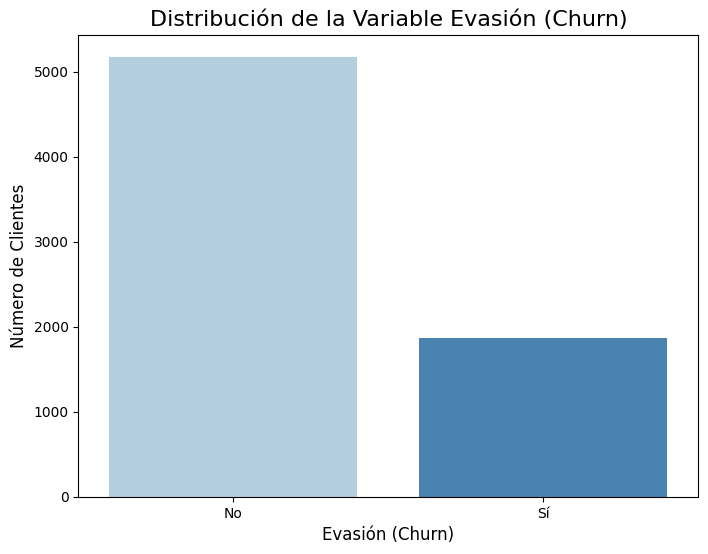

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

sns.countplot(x=df_analisis['Cancelacion'].replace({0: 'No', 1: 'Sí'}), palette='Blues', hue=df_analisis['Cancelacion'].replace({0: 'No', 1: 'Sí'}), legend=False)
plt.title('Distribución de la Variable Evasión (Churn)', fontsize=16)
plt.xlabel('Evasión (Churn)', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.show()

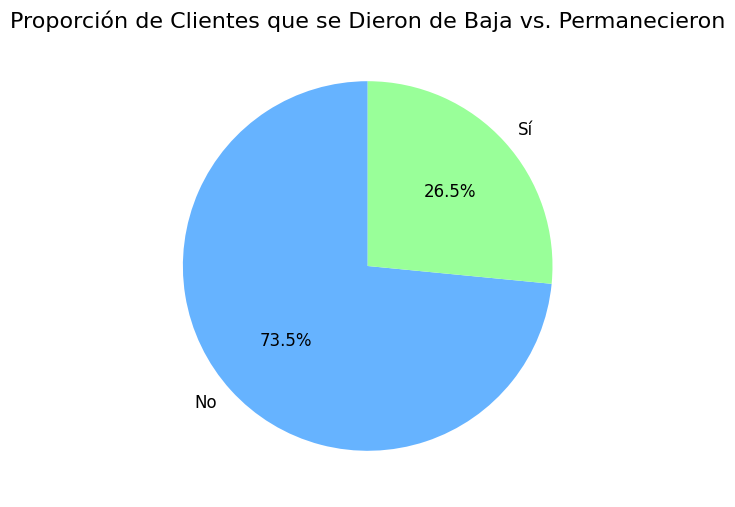

In [ ]:
color1, color2 = '#66b3ff', '#99ff99'

plt.figure(figsize=(8, 6))

churn_counts = df_analisis['Cancelacion'].replace({0: 'No', 1: 'Sí'}).value_counts()
churn_counts.plot(kind='pie', autopct='%1.1f%%', colors=[color1,color2], startangle=90, textprops={'fontsize': 12})

plt.title('Proporción de Clientes que se Dieron de Baja vs. Permanecieron', fontsize=16)
plt.ylabel('')
plt.show()

## Recuento de evasión por variables categóricas

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

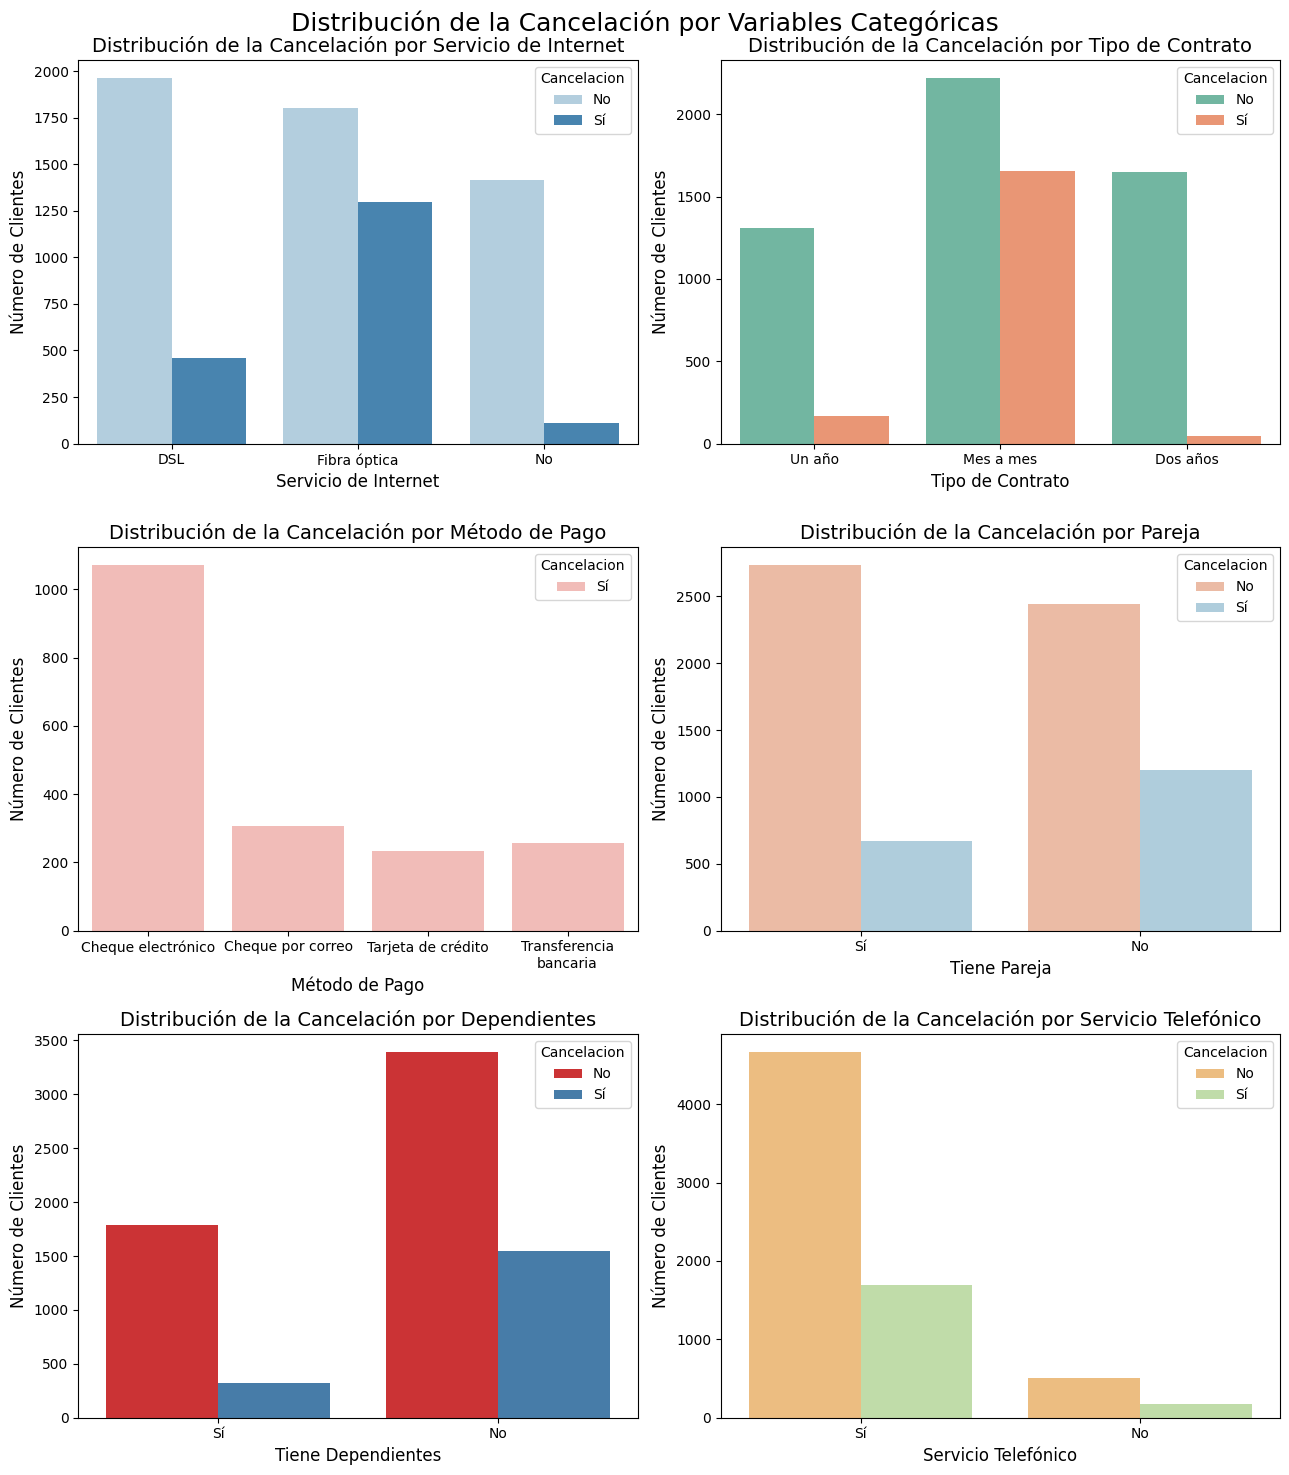

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(13, 15))
fig.suptitle('Distribución de la Cancelación por Variables Categóricas', fontsize=18)

sns.countplot(x='Servicio_internet', hue=df_analisis['Cancelacion'].replace({0: 'No', 1: 'Sí'}), data=df_analisis, palette='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Distribución de la Cancelación por Servicio de Internet', fontsize=14)
axes[0, 0].set_xlabel('Servicio de Internet', fontsize=12)
axes[0, 0].set_ylabel('Número de Clientes', fontsize=12)

sns.countplot(x='Tipo_contrato', hue=df_analisis['Cancelacion'].replace({0: 'No', 1: 'Sí'}), data=df_analisis, palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Distribución de la Cancelación por Tipo de Contrato', fontsize=14)
axes[0, 1].set_xlabel('Tipo de Contrato', fontsize=12)
axes[0, 1].set_ylabel('Número de Clientes', fontsize=12)

df_cancelados = df_analisis[df_analisis['Cancelacion'] == 1]

sns.countplot(x=df_cancelados['Metodo_pago'].replace({'Cheque por correo': 'Cheque por correo',
                                                    'Cheque electrónico': 'Cheque electrónico',
                                                    'Tarjeta de crédito (automático)': 'Tarjeta de crédito',
                                                    'Transferencia bancaria (automático)': 'Transferencia\nbancaria'}),
              hue=df_cancelados['Cancelacion'].replace({0: 'No', 1: 'Sí'}), data=df_cancelados, palette='Pastel1', ax=axes[1, 0])
axes[1, 0].set_title('Distribución de la Cancelación por Método de Pago', fontsize=14)
axes[1, 0].set_xlabel('Método de Pago', fontsize=12)
axes[1, 0].set_ylabel('Número de Clientes', fontsize=12)

sns.countplot(x=df_analisis['Pareja'].replace({0: 'No', 1: 'Sí'}),
              hue=df_analisis['Cancelacion'].replace({0: 'No', 1: 'Sí'}),
              data=df_analisis, palette='RdBu', ax=axes[1, 1])
axes[1, 1].set_title('Distribución de la Cancelación por Pareja', fontsize=14)
axes[1, 1].set_xlabel('Tiene Pareja', fontsize=12)
axes[1, 1].set_ylabel('Número de Clientes', fontsize=12)

sns.countplot(x=df_analisis['Dependientes'].replace({0: 'No', 1: 'Sí'}),
              hue=df_analisis['Cancelacion'].replace({0: 'No', 1: 'Sí'}),
              data=df_analisis, palette='Set1', ax=axes[2, 0])
axes[2, 0].set_title('Distribución de la Cancelación por Dependientes', fontsize=14)
axes[2, 0].set_xlabel('Tiene Dependientes', fontsize=12)
axes[2, 0].set_ylabel('Número de Clientes', fontsize=12)

sns.countplot(x=df_analisis['Servicio_telefono'].replace({0: 'No', 1: 'Sí'}),
              hue=df_analisis['Cancelacion'].replace({0: 'No', 1: 'Sí'}),
              data=df_analisis, palette='Spectral', ax=axes[2, 1])
axes[2, 1].set_title('Distribución de la Cancelación por Servicio Telefónico', fontsize=14)
axes[2, 1].set_xlabel('Servicio Telefónico', fontsize=12)
axes[2, 1].set_ylabel('Número de Clientes', fontsize=12)

plt.tight_layout()
plt.show()

## Conteo de evasión por variables numéricas

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

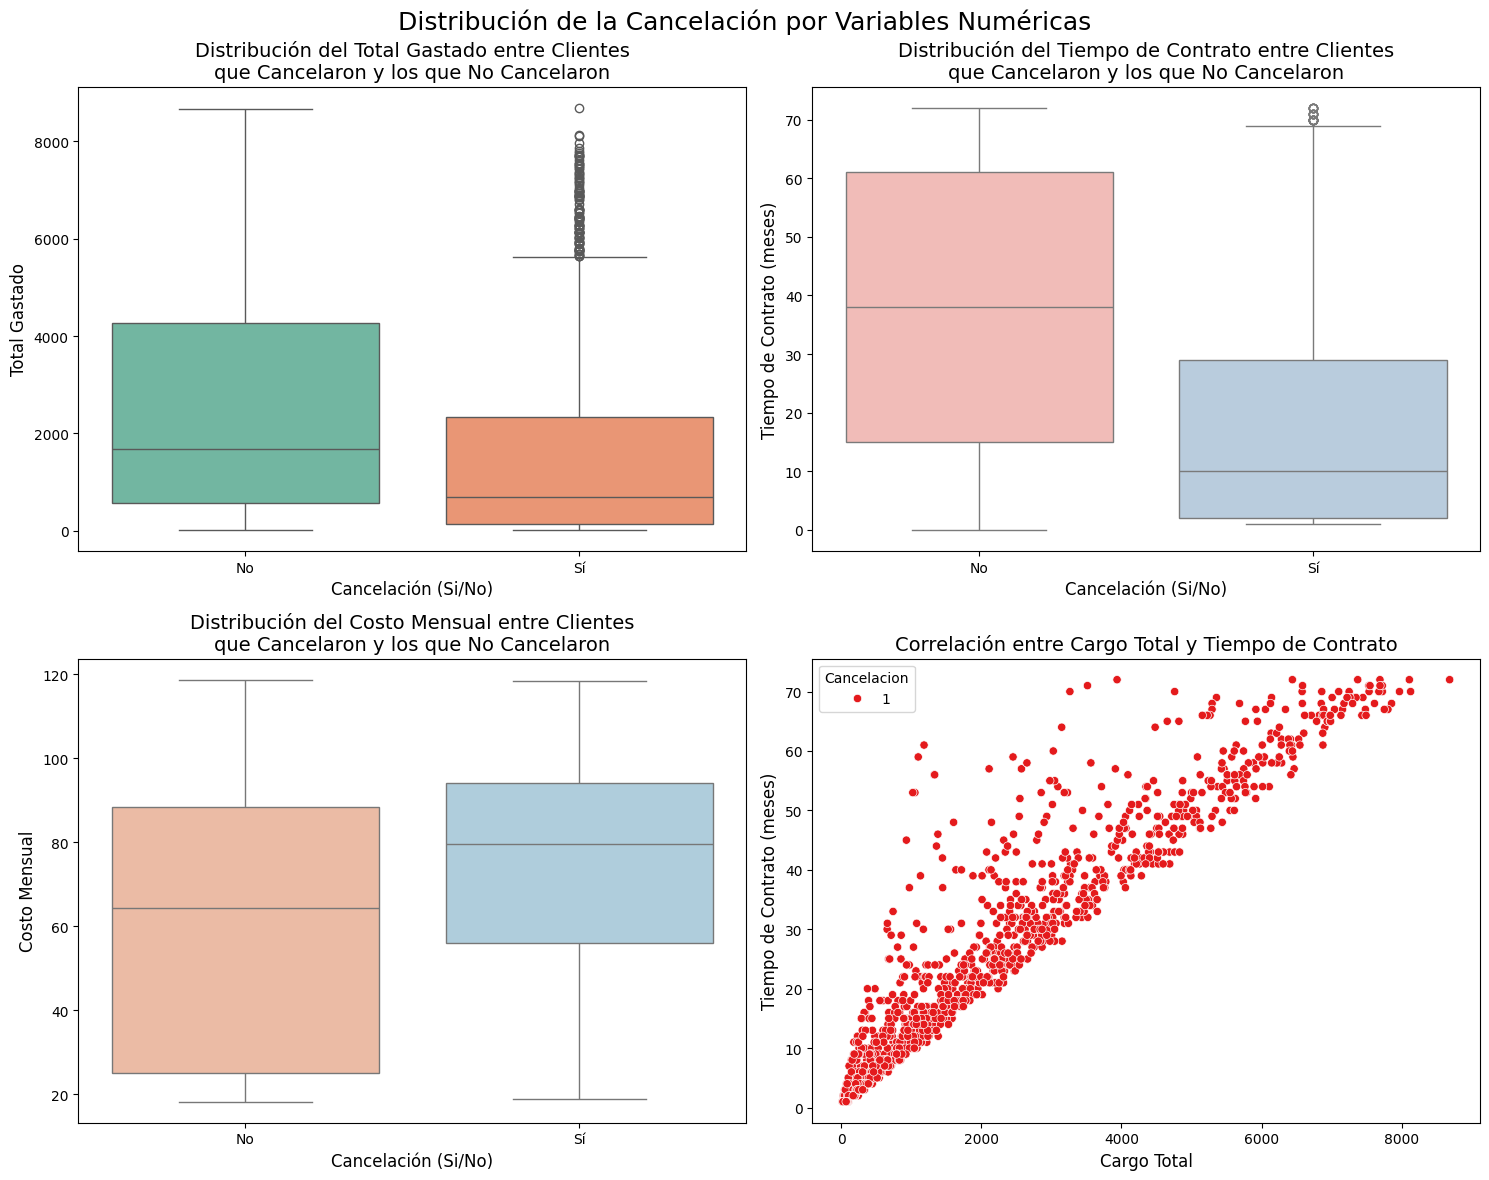

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribución de la Cancelación por Variables Numéricas', fontsize=18)

sns.boxplot(x=df_analisis['Cancelacion'].replace({0: 'No', 1: 'Sí'}),
            hue=df_analisis['Cancelacion'].replace({0: 'No', 1: 'Sí'}),
            y='Cargo_total', data=df_analisis, palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title('Distribución del Total Gastado entre Clientes\nque Cancelaron y los que No Cancelaron', fontsize=14)
axes[0, 0].set_xlabel('Cancelación (Si/No)', fontsize=12)
axes[0, 0].set_ylabel('Total Gastado', fontsize=12)

sns.boxplot(x=df_analisis['Cancelacion'].replace({0: 'No', 1: 'Sí'}),
            hue=df_analisis['Cancelacion'].replace({0: 'No', 1: 'Sí'}),
            y='Tiempo_contrato', data=df_analisis, palette='Pastel1', ax=axes[0, 1])
axes[0, 1].set_title('Distribución del Tiempo de Contrato entre Clientes\nque Cancelaron y los que No Cancelaron', fontsize=14)
axes[0, 1].set_xlabel('Cancelación (Si/No)', fontsize=12)
axes[0, 1].set_ylabel('Tiempo de Contrato (meses)', fontsize=12)

sns.boxplot(x=df_analisis['Cancelacion'].replace({0: 'No', 1: 'Sí'}),
            hue=df_analisis['Cancelacion'].replace({0: 'No', 1: 'Sí'}),
            y='Cargo_mensual', data=df_analisis, palette='RdBu', ax=axes[1, 0])
axes[1, 0].set_title('Distribución del Costo Mensual entre Clientes\nque Cancelaron y los que No Cancelaron', fontsize=14)
axes[1, 0].set_xlabel('Cancelación (Si/No)', fontsize=12)
axes[1, 0].set_ylabel('Costo Mensual', fontsize=12)

sns.scatterplot(x='Cargo_total', y='Tiempo_contrato', data=df_cancelados, hue='Cancelacion', palette='Set1', ax=axes[1, 1])
axes[1, 1].set_title('Correlación entre Cargo Total y Tiempo de Contrato', fontsize=14)
axes[1, 1].set_xlabel('Cargo Total', fontsize=12)
axes[1, 1].set_ylabel('Tiempo de Contrato (meses)', fontsize=12)

plt.tight_layout()
plt.show()

## Otros análisis

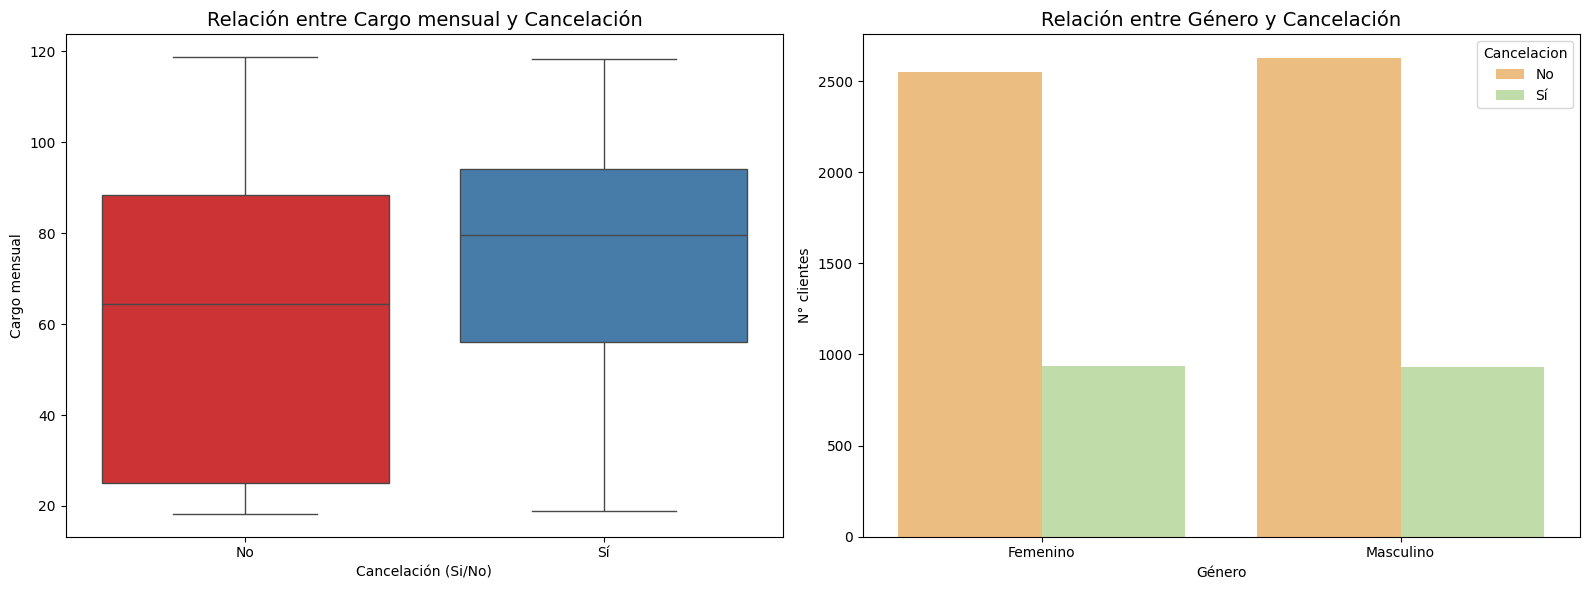

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x=df_analisis['Cancelacion'].replace({0: 'No', 1: 'Sí'}), y='Cargo_mensual',
            data=df_analisis, ax=axes[0], palette='Set1', hue='Cancelacion', legend=False)
axes[0].set_title('Relación entre Cargo mensual y Cancelación', fontsize=14)
axes[0].set_xlabel('Cancelación (Si/No)')
axes[0].set_ylabel('Cargo mensual')

sns.countplot(x='Genero', hue=df_analisis['Cancelacion'].replace({0: 'No', 1: 'Sí'}), data=df_analisis, ax=axes[1], palette='Spectral')
axes[1].set_title('Relación entre Género y Cancelación', fontsize=14)
axes[1].set_xlabel('Género')
axes[1].set_ylabel('N° clientes')

plt.tight_layout()
plt.show()

#📄Informe final

Finaliza el desafío elaborando un informe dentro del mismo notebook que resuma todo el trabajo realizado. El informe debe incluir:

🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

🔹 Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.

Asegúrate de que el informe esté bien estructurado, claro y respaldado por visualizaciones que refuercen tus conclusiones. 🚀

## 1. Introducción

El objetivo de este análisis es comprender los factores que influyen en la evasión de clientes (churn) en una empresa de telecomunicaciones. La evasión es un problema crucial para las empresas, ya que la retención de clientes es más rentable que la adquisición de nuevos. Este análisis busca identificar características de los clientes que tienen más probabilidades de cancelar su servicio en la compañia Telecom X, permitiendo a la empresa tomar medidas estratégicas para reducir la tasa de evasión.

## 2. Limpieza y tratamiento de datos

### 2.1 Importación de datos.

Los datos fueron extraídos de un archivo JSON alojado en un repositorio de Github, donde se aplica una normalización (aplanamiento) de datos en los diccionarios del archivo debido a que en el archivo existen disccionarios dentro de diccionarios. Finalmente estos fueron transformados en un DataFrame de Pandas.

### 2.2 Limpieza da datos.

Se realizaron los siguientes pasos de limpieza:

- Transformación de la variable "account_Charges_Total" a una variable numerica (float) ya que corresponde a la cantidad total pagada por el cliente.

- Eliminación de registros vacíos en la columna "Churn", los que corresponden aproximadamente a un 3% del total de registros en el dataset.

- Verificación de valores NaN en variables numericas, sin realizar cambios en el dataset.

- Eliminación de espacios en blanco al principio y al final del string en los valores de las columnas de tipo object (texto) para estandarizar.

- Conversión de valores que indican ausencia de servicio en aquellas columnas donde se encuentran valores de Si/No y una tercera opcion que indica tal ausencia de servicio ('No phone service', 'No internet service') para simplificar los análisis.

- Conversión las columnas categóricas con valores de Sí/No a valores binarios (1 para Sí y 0 para No).

- Traducción de los nombres de las columnas y de valores al español para mejorar la comprensión del dataset.

## 3. Análisis exploratorio de datos

### 3.1 Análisis descriptivo

Utilizando la la función `.describe()` se obtuvo valores estadisticos para el dataset, dentro de las que se incluyen valores mínimo y máximo, conteo, valor promedio, desviacion estandar y los percentiles 0.25, 0.5 (mediana) y 0.75.

### 3.2 Distribución de la evasión (Cancelación)


Utilizando las librerías de Matplotlib y Seaborn, se visualizó la proporción de clientes que cancelaron el servicio en comparación con los que no lo hicieron.

Para el gráfico de conteo:

    plt.figure(figsize=(8, 6))

    sns.countplot(x=df_analisis['Cancelacion'].replace({0: 'No', 1: 'Sí'}), palette='Blues', hue=df_analisis['Cancelacion'].replace({0: 'No', 1: 'Sí'}), legend=False)
    plt.title('Distribución de la Variable Evasión (Churn)', fontsize=16)
    plt.xlabel('Evasión (Churn)', fontsize=12)
    plt.ylabel('Número de Clientes', fontsize=12)
    plt.show()

Para el gráfico de torta:

    color1, color2 = '#66b3ff', '#99ff99'

    plt.figure(figsize=(8, 6))

    churn_counts = df_analisis['Cancelacion'].replace({0: 'No', 1: 'Sí'}).value_counts()
    churn_counts.plot(kind='pie', autopct='%1.1f%%', colors=[color1,color2], startangle=90, textprops={'fontsize': 12})

    plt.title('Proporción de Clientes que se Dieron de Baja vs. Permanecieron', fontsize=16)
    plt.ylabel('')
    plt.show()


Resultado: Se observó que una porción significativa de clientes permanece con el servicio, mientras que una parte menor decidió cancelarlo (aproximadamente un 25%).

### 3.3 Distribución de la evasión por variables categóricas y numéricas

Se realizaron diversas graficas de conteo para visualizar la cancelación de los clientes segun variables categóricas.

Además, se realizaron gráficas de cajas para relacionar la cancelacion de los clientes pero con variables numéricas y una grafica de dispersion para relacionar el tiempo de permanencia contra el gasto total del cliente.

## 4. Conclusiones e Insights

Cancelación vs. Gasto Total: Los clientes que cancelan tienden a gastar menos, lo que puede indicar que no están tan comprometidos con el servicio.

Tiempo de Contrato: Los clientes con contratos más cortos son más propensos a cancelar. Esto sugiere que una estrategia de renovación anticipada podría ayudar a reducir la evasión.

Método de Pago: Los clientes con métodos de pago automáticos muestran una menor tasa de cancelación, lo que puede indicar que automatizar pagos podría ser una estrategia efectiva para mejorar la retención.

- Proporción de Cancelación:
  * 73.5% de los clientes permanecen, mientras que 26.5% cancelan. Aunque la mayoría no cancela, el 26.5% es una tasa significativa que requiere atención.

- Distribución por Servicio de Internet:
  * La cancelación es más alta en clientes con fibra óptica, seguida por DSL. Esto podría indicar problemas con la calidad del servicio, expectativas no cumplidas o competencia en el mercado de fibra.
  * Sugerencia: Investigar la satisfacción del cliente con la fibra óptica y comparar con la competencia.

- Tipo de Contrato:
  * La cancelación es más alta en contratos mes a mes, seguidos por un año. Los contratos a dos años tienen la menor cancelación.
  * Sugerencia: Promover contratos a más largo plazo con incentivos (descuentos, beneficios adicionales).

- Costo Mensual y Total Gastado:
  * Los clientes que cancelan tienden a tener un costo mensual más alto y un total gastado menor (posiblemente por cancelar antes).
  * Sugerencia: Revisar la estructura de precios para clientes con planes costosos y ofrecer descuentos por fidelidad.

- Tiempo de Contrato:
  * Los clientes que cancelan tienen un tiempo de contrato más corto, lo que refuerza la importancia de retenerlos en los primeros meses.
  * Sugerencia: Implementar programas de onboarding y retención temprana (ej. llamadas de seguimiento en los primeros 3 meses).

- Método de Pago:
  * No se muestran datos claros, pero si hay diferencias, podría indicar que ciertos métodos (ej. transferencia) son menos convenientes.
  * Sugerencia: Analizar si métodos de pago específicos están asociados a cancelaciones y optimizarlos.

- Género:
  * No hay datos claros, pero si hay diferencias por género, podría sugerir necesidades no cubiertas en algún grupo.
  * Sugerencia: Segmentar campañas de retención por género si se identifica un patrón.

## 5. Recomendaciones

5.1 Enfoque en Fibra Óptica:

- Mejorar la calidad o comunicación de beneficios.
- Encuestas para entender insatisfacción.

5.2 Incentivar Contratos Largos:

- Descuentos progresivos para contratos de 1-2 años.
- Penalizaciones menores por cancelación anticipada.

5.3. Programas de Retención Temprana:

- Ofertas especiales para clientes nuevos en los primeros meses.
- Servicio al cliente proactivo.

5.4 Reducción de Costos para Clientes en Riesgo:

- Identificar clientes con cargos altos y ofrecer planes personalizados.
- Programas de lealtad (ej. puntos canjeables).

5.5 Optimización de Métodos de Pago:

- Promover opciones automáticas (ej. débito automático) con beneficios.